## Import Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('Book1.csv')
data.head()
#data.shape

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Correlation Check

In [306]:
correlations = data.corr()
correlations

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


## Visualizing the data for any Relations

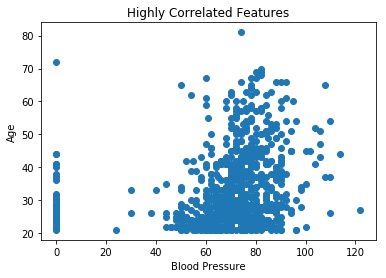

In [307]:
def visualise(data):
    fig, ax = plt.subplots()
    ax.scatter(data.iloc[:,2].values, data.iloc[:,7].values)
    ax.set_title('Highly Correlated Features')
    ax.set_xlabel('Blood Pressure')
    ax.set_ylabel('Age')

visualise(data)

## Replacing the Zeros with Null values

In [308]:
data[['Glucose','BMI']] = data[['Glucose','BMI']].replace(0, np.NaN)
data.dropna(inplace=True)

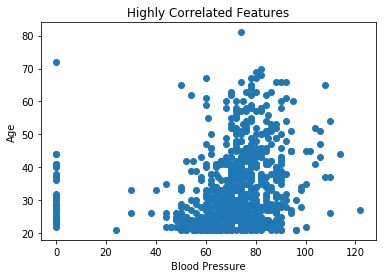

In [309]:
visualise(data)

## Feature Selection

In [310]:
X = data[['Glucose','BMI','Pregnancies','BloodPressure','SkinThickness','Insulin',
          'DiabetesPedigreeFunction','Age']].values
y = data[['Outcome']].values

In [311]:
data['Outcome'].mean()

0.35106382978723405

Bi-Variate Analysis

In [296]:
data['Rank']=pd.qcut(data['Age'].rank(method='first').values,10,duplicates='drop').codes+1
gr_data = data.groupby(['Rank']) 
gr_data.max()
#data.groupby('Rank')['Outcome'].mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Rank,,,,,,,,,
1,4,177.0,96,50,480,43.5,1.072,22,1
2,8,199.0,100,43,680,57.3,1.394,23,1
3,6,193.0,88,56,387,53.2,1.893,25,1
4,6,193.0,122,63,540,67.1,2.420,27,1
5,10,198.0,98,49,579,52.9,1.698,29,1
6,10,197.0,96,60,744,49.7,2.329,33,1
7,12,191.0,110,45,545,50.0,1.400,38,1
8,14,197.0,104,48,342,52.3,1.191,43,1
9,17,188.0,114,54,495,47.9,1.781,51,1


In [283]:
#data['age_ind']=np.where(data['Age'] <=33, 0, 1)
#data['diabetes_function_ind']=np.where(data['DiabetesPedigreeFunction'] <=0.878, 0, 1)
#data['BMI_ind']=np.where(data['BMI'] <=41.5, 0, 1)
#data['Insulin_ind']=np.where(data['Insulin'] <=210, 0, 1)
#data['Skin_Thick_ind']=np.where(data['SkinThickness'] <=35, 0, 1)
#data['Blood_Pr_ind']=np.where(data['BloodPressure'] <=88, 0, 1)
#data.drop(['Rank'],axis=1)
#data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,y_pred_P,P_Rank,age_ind
0,6,148.0,72,35,0,33.6,0.627,50,1,0.594526,8,1
1,1,85.0,66,29,0,26.6,0.351,31,0,0.087894,1,0
2,8,183.0,64,0,0,23.3,0.672,32,1,0.810855,10,0
3,1,89.0,66,23,94,28.1,0.167,21,0,0.102053,1,0
4,0,137.0,40,35,168,43.1,2.288,33,1,0.771930,10,0


## Standardization & Scaling of Features

In [228]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [229]:
mean = np.m ean(X,axis=0)
print('Mean: (%d, %d)' % (mean[0], mean[1]))
standard_deviation = np.std(X, axis=0)
print('Standard deviation: (%d, %d)' % (standard_deviation[0], standard_deviation[1]))

Mean: (0, 0)
Standard deviation: (1, 1)


In [10]:
print(X[0:10,:])

[[ 0.85211873  0.16540919  0.63710986  0.1253525   0.89727837 -0.70219989
   0.46667123  1.42608616]
 [-1.2079944  -0.84552075 -0.84527447 -0.20233607  0.52039138 -0.70219989
  -0.36997511 -0.19762243]
 [ 1.99662603 -1.322102    1.2300636  -0.31156559 -1.30122904 -0.70219989
   0.60308096 -0.11216408]
 [-1.07719357 -0.62889291 -0.84527447 -0.20233607  0.1435044   0.10920865
  -0.92773934 -1.05220589]
 [ 0.49241644  1.53738552 -1.14175134 -1.62231987  0.89727837  0.74797707
   5.5017059  -0.02670573]
 [-0.19428794 -0.98993931  0.340633    0.23458202 -1.30122904 -0.70219989
  -0.82467421 -0.28308077]
 [-1.43689586 -0.21007908 -0.25232074 -1.07617225  0.70883487  0.05741661
  -0.68220183 -0.62491416]
 [-0.22698815  0.41092074  1.82301733 -3.80691032 -1.30122904 -0.70219989
  -1.02777314 -0.36853912]
 [ 2.45442895 -0.28228836 -0.5487976   0.01612297  1.52542334  3.98497922
  -0.95502128  1.6824612 ]
 [-0.39048919  0.74308343  0.04415613  1.21764772 -1.30122904 -0.70219989
  -0.85498748 -0.

In [312]:
X = data[['Glucose','BMI','Pregnancies','BloodPressure','SkinThickness','Insulin',
          'DiabetesPedigreeFunction','Age']].values
y = data[['Outcome']].values

## Train-Test Split

In [313]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
y_test.shape

(226, 1)

## Logistic Regression Model

In [314]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)

C:\Anaconda_Python\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predictions

In [315]:
y_pred=logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


In [302]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8053097345132744


In [317]:
y_pred_P=logreg.predict_proba(X)[:,1]
data['']=pd.DataFrame(y_pred_P)
data['P_Rank']=pd.qcut(data['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
data.groupby('P_Rank')['Outcome'].mean()y_pred_P
#data.head()

P_Rank
0     0.437500
1     0.378378
2     0.324324
3     0.301370
4     0.310811
5     0.273973
6     0.459459
7     0.342466
8     0.351351
9     0.356164
10    0.391892
Name: Outcome, dtype: float64

In [318]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0], dtype=int64)

## Performance & Accuracy

In [319]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[133,  21],
       [ 23,  49]], dtype=int64)

Text(0.5,257.44,'Predicted label')

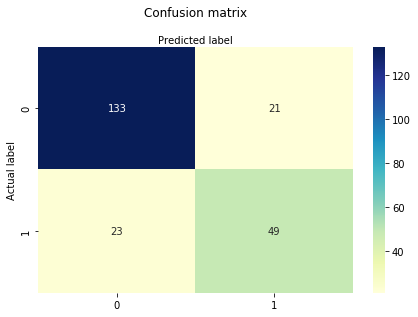

In [223]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [224]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8053097345132744
Precision: 0.7
Recall: 0.6805555555555556


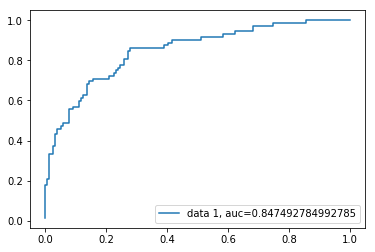

In [225]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

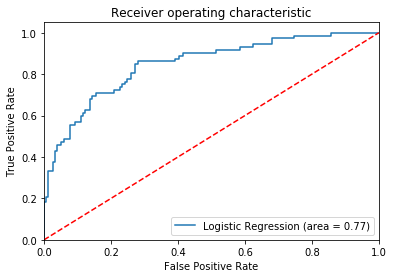

In [227]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.figure()

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)


plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()